Sebastian Raschka, 2015  
`mlxtend`, a library of extension and helper modules for Python's data analysis and machine learning libraries

- GitHub repository: https://github.com/rasbt/mlxtend
- Documentation: http://rasbt.github.io/mlxtend/

View this page in [jupyter nbviewer](http://nbviewer.ipython.org/github/rasbt/mlxtend/blob/master/docs/sources/_ipynb_templates/regressor/linear_regression.ipynb)

In [3]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p matplotlib,numpy,scipy,mlxtend

Sebastian Raschka 
last updated: 2016-03-03 

CPython 3.5.0
IPython 4.0.3

matplotlib 1.5.1
numpy 1.10.4
scipy 0.17.0
mlxtend 0.3.1.dev0


In [4]:
%matplotlib inline

# StackingRegressor

An ensemble-learning meta-regressor for stacking regression

> from mlxtend.regressor import StackingRegressor

# Overview

Stacking regression is an ensemble learning technique to combine multiple regression models via a meta-regressor. The individual regression models are trained based on the complete training set; then, the meta-regressor is fitted based on the outputs -- meta-features -- of the individual regression models in the ensemble.

![](./StackingRegressor_files/stackingregression_overview.png)

### References


- Breiman, Leo. "[Stacked regressions.](http://link.springer.com/article/10.1023/A:1018046112532#page-1)" Machine learning 24.1 (1996): 49-64.

# Examples

## Example 1 - Simple Stacked Regression

In [1]:
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np

# Generating a sample dataset
np.random.seed(1)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(8))

Mean Squared Error: 0.20
Variance Score: 0.70


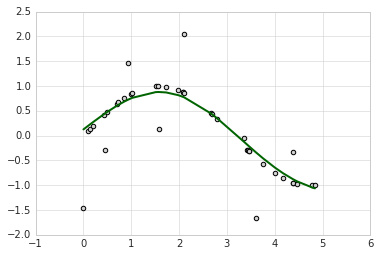

In [5]:
# Initializing models

lr = LinearRegression()
svr_lin = SVR(kernel='linear')
ridge = Ridge(random_state=1)
svr_rbf = SVR(kernel='rbf')

stregr = StackingRegressor(regressors=[svr_lin, lr, ridge], 
                           meta_regressor=svr_rbf)

# Training the stacking classifier

stregr.fit(X, y)
stregr.predict(X)

# Evaluate and visualize the fit

print("Mean Squared Error: %.2f"
      % np.mean((stregr.predict(X) - y) ** 2))
print('Variance Score: %.2f' % stregr.score(X, y))

with plt.style.context(('seaborn-whitegrid')):
    plt.scatter(X, y, c='lightgray')
    plt.plot(X, stregr.predict(X), c='darkgreen', lw=2)

plt.show()

## Example 2 - Stacked Regression and GridSearch

To set up a parameter grid for scikit-learn's `GridSearch`, we simply provide the estimator's names in the parameter grid -- in the special case of the meta-regressor, we append the `'meta-'` prefix.

In [6]:
from sklearn.grid_search import GridSearchCV

# Initializing models

lr = LinearRegression()
svr_lin = SVR(kernel='linear')
ridge = Ridge(random_state=1)
svr_rbf = SVR(kernel='rbf')
stregr = StackingRegressor(regressors=[svr_lin, lr, ridge], 
                           meta_regressor=svr_rbf)

params = {'ridge__alpha': [0.01, 1.0],
          'svr__C': [0.01, 1.0],
          'meta-svr__C': [0.01, 1.0]}

grid = GridSearchCV(estimator=stregr, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X, y)

for params, mean_score, scores in grid.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
        % (mean_score, scores.std() / 2, params))

-10.771 (+/-7.199) for {'ridge__alpha': 0.01, 'svr__C': 0.01, 'meta-svr__C': 0.01}
-10.549 (+/-7.116) for {'ridge__alpha': 0.01, 'svr__C': 1.0, 'meta-svr__C': 0.01}
-10.775 (+/-7.201) for {'ridge__alpha': 1.0, 'svr__C': 0.01, 'meta-svr__C': 0.01}
-10.552 (+/-7.118) for {'ridge__alpha': 1.0, 'svr__C': 1.0, 'meta-svr__C': 0.01}
-3.727 (+/-2.972) for {'ridge__alpha': 0.01, 'svr__C': 0.01, 'meta-svr__C': 1.0}
-1.023 (+/-0.667) for {'ridge__alpha': 0.01, 'svr__C': 1.0, 'meta-svr__C': 1.0}
-3.784 (+/-3.016) for {'ridge__alpha': 1.0, 'svr__C': 0.01, 'meta-svr__C': 1.0}
-1.042 (+/-0.685) for {'ridge__alpha': 1.0, 'svr__C': 1.0, 'meta-svr__C': 1.0}


Mean Squared Error: 0.20
Variance Score: 0.70


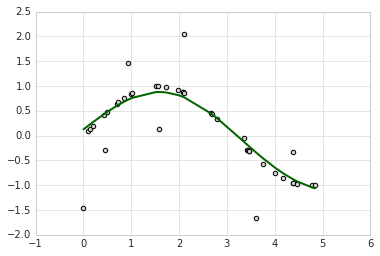

In [7]:
# Evaluate and visualize the fit
print("Mean Squared Error: %.2f"
      % np.mean((grid.predict(X) - y) ** 2))
print('Variance Score: %.2f' % grid.score(X, y))

with plt.style.context(('seaborn-whitegrid')):
    plt.scatter(X, y, c='lightgray')
    plt.plot(X, grid.predict(X), c='darkgreen', lw=2)

plt.show()

In case we are planning to use a regression algorithm multiple times, all we need to do is to add an additional number suffix in the parameter grid as shown below:

In [9]:
stregr = StackingRegressor(regressors=[ridge, ridge, svr_lin], 
                           meta_regressor=svr_rbf)

params = {'ridge-1__alpha': [0.01, 1.0],
          'ridge-2__alpha': [0.01, 1.0],
          'svr__C': [0.01, 1.0],
          'meta-svr__C': [0.01, 1.0]}

grid = GridSearchCV(estimator=stregr, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X, y)

for params, mean_score, scores in grid.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
        % (mean_score, scores.std() / 2, params))

-10.771 (+/-7.199) for {'ridge-1__alpha': 0.01, 'ridge-2__alpha': 0.01, 'svr__C': 0.01, 'meta-svr__C': 0.01}
-10.549 (+/-7.116) for {'ridge-1__alpha': 0.01, 'ridge-2__alpha': 0.01, 'svr__C': 1.0, 'meta-svr__C': 0.01}
-10.775 (+/-7.201) for {'ridge-1__alpha': 0.01, 'ridge-2__alpha': 1.0, 'svr__C': 0.01, 'meta-svr__C': 0.01}
-10.552 (+/-7.118) for {'ridge-1__alpha': 0.01, 'ridge-2__alpha': 1.0, 'svr__C': 1.0, 'meta-svr__C': 0.01}
-10.775 (+/-7.201) for {'ridge-1__alpha': 1.0, 'ridge-2__alpha': 0.01, 'svr__C': 0.01, 'meta-svr__C': 0.01}
-10.552 (+/-7.118) for {'ridge-1__alpha': 1.0, 'ridge-2__alpha': 0.01, 'svr__C': 1.0, 'meta-svr__C': 0.01}
-10.780 (+/-7.203) for {'ridge-1__alpha': 1.0, 'ridge-2__alpha': 1.0, 'svr__C': 0.01, 'meta-svr__C': 0.01}
-10.556 (+/-7.120) for {'ridge-1__alpha': 1.0, 'ridge-2__alpha': 1.0, 'svr__C': 1.0, 'meta-svr__C': 0.01}
-3.728 (+/-2.972) for {'ridge-1__alpha': 0.01, 'ridge-2__alpha': 0.01, 'svr__C': 0.01, 'meta-svr__C': 1.0}
-1.023 (+/-0.667) for {'ridge-1__

# API

In [10]:
with open('../../api_modules/mlxtend.regressor/StackingRegressor.md', 'r') as f:
    print(f.read())

## StackingRegressor

*StackingRegressor(regressors, meta_regressor, verbose=0)*

A Stacking regressor for scikit-learn estimators for regression.

**Parameters**

- `regressors` : array-like, shape = [n_regressors]

    A list of regressors.
    Invoking the `fit` method on the `StackingRegressor` will fit clones
    of those original regressors that will
    be stored in the class attribute
    `self.regr_`.

- `verbose` : int, optional (default=0)

    Controls the verbosity of the building process.
    - `verbose=0` (default): Prints nothing
    - `verbose=1`: Prints the number & name of the regressor being fitted
    - `verbose=2`: Prints info about the parameters of the
    regressor being fitted
    - `verbose>2`: Changes `verbose` param of the underlying regressor to
    self.verbose - 2

**Attributes**

- `regr_` : list, shape=[n_regressors]

    Fitted regressors (clones of the original regressors)

- `meta_regr_` : estimator

    Fitted meta-regressor (clone of the original 